# Introduction:
For our final project we looked through different datasets that lead us to finding Squirrel Hill South as the best neighborhood in Pittsburgh. We did this through analyzing data from three different datasets and then combining this data to fit our metric. Our metric was about which neighborhood is the best for kids. In order to come up with our metric, each member of our group found a dataset that interested them, and from these three datasets we came up with a metric that fit all three. From each dataset, we created rating out of ten for each neighborhood. After that, we combined the ratings and found the average rating for each neighborhood. The neighborhood with the highest average rating was our best neighborhood. As an alternative, we could have came up with our metric and then explored datasets that fit this metric. Also, we have could have looked into some of the other data that our datasets provided rather than focusing on which neighborhoods had the most of something. Finally, we could have merged all of our datasets and determined the best neighborhood that way instead of using a rating system. 


# The Metric:
Our metric explores which neighborhood has is the best in terms of keeping children safe and entertained. To determine this, we use datasets that show the number of traffic signs, information on playgrounds, and a data on street art in each neighborhood. For the playground data set, we took into account the number of playgrounds. Another dataset was used to show the number of traffic signs per neighborhood, and our final dataset showed how much art was in a given neighborhood. From there, we gave each neighborhood a rating out of ten which we found from dividing the total art, playgrounds, and the number of traffic signs by the greatest number in the dataset and multiplied that by ten. We then combined the ratings and found the average rating for each neighborhood which is how we measured our metric. The neighborhood with the highest average rating would be our best neighborhood, and that neighborhood came out to be Squirrel Hill South.


# The Best Neighborhood:
## Code

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as geo

hood=geo.read_file("Neighborhoods/Neighborhoods_.shp")    #Allows us to create Choropleth maps later

play = pd.read_csv("https://data.wprdc.org/datastore/dump/e39ef76e-0a11-47c8-a86f-a37f55db7a2b")  #Playground Dataset
public_art_data = pd.read_csv("public-art.csv", index_col="id")                                   #Public Art Dataset
signs=pd.read_csv("https://data.wprdc.org/datastore/dump/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c")   #Traffic Signs Dataset

## Traffic Signs Visualization

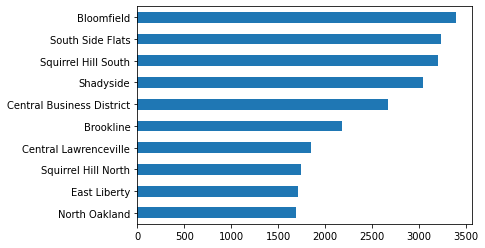

In [3]:
signs1 = signs['neighborhood'].value_counts().sort_values(ascending=True).tail(10)
signs1.plot.barh(x="neighborhood",y="mounting_fixtures")

## Art Visualization

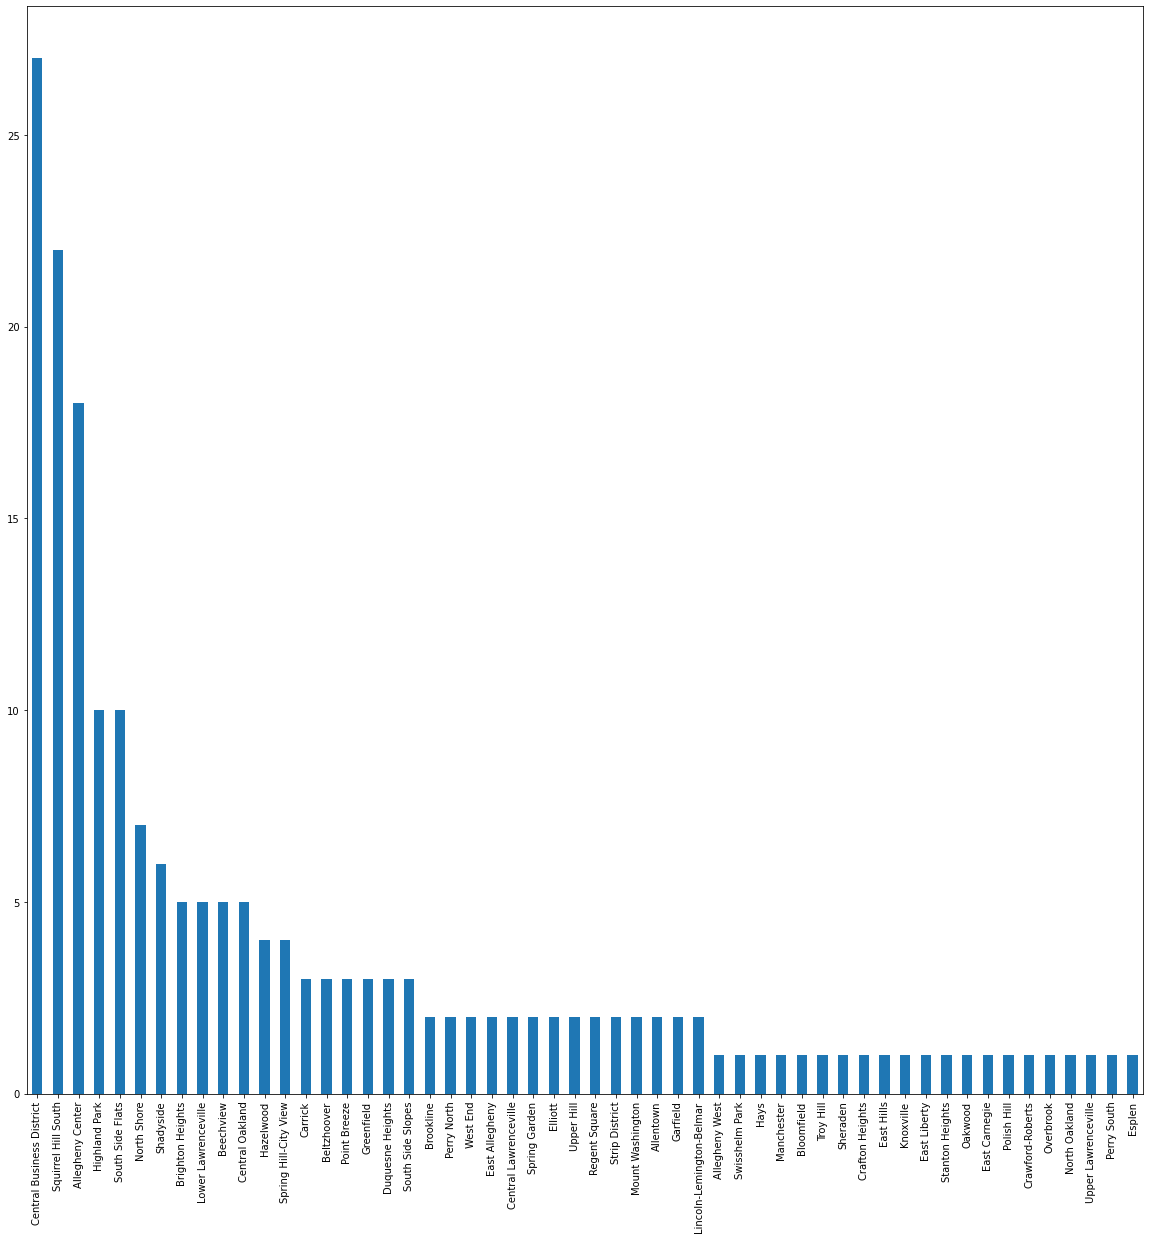

In [4]:
neighborhoods = public_art_data['neighborhood'].value_counts()
neighborhoods.plot.bar(figsize=(20, 20))

## Playground Visualization

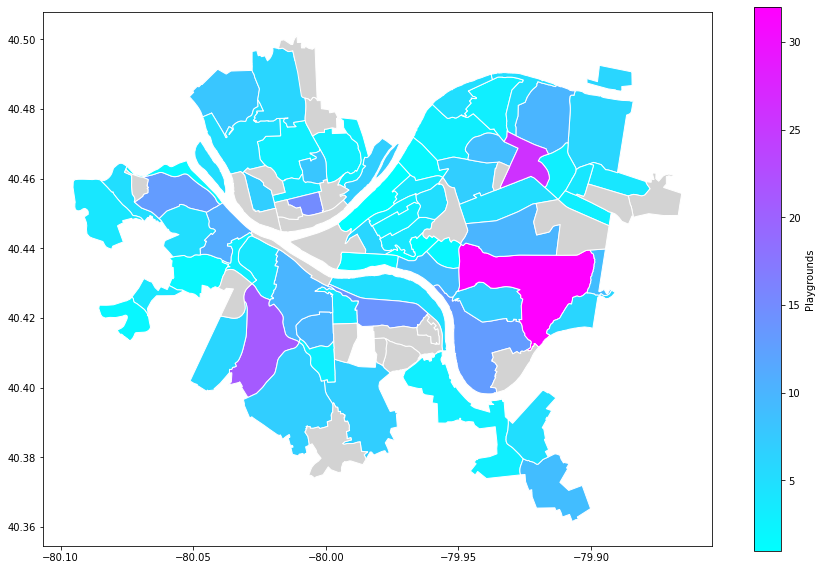

In [5]:
neighbor=play.groupby('neighborhood').count()
play_map = hood.merge(neighbor, how='left', left_on='hood', right_on='neighborhood')
play_map.plot(column='ada_accessible',
             cmap='cool',              
               edgecolor="white",        
               legend=True,              
               legend_kwds={'label': "Playgrounds"},
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
             )

# Combined Metric Visualization

In [6]:
#This pivots the data so that we can merge the datasets easily

neighborhood1 = play['neighborhood'].value_counts().sort_values(ascending=False).reset_index()  

neighborhood2 = public_art_data['neighborhood'].value_counts().sort_values(ascending=False).reset_index()

neighborhood3 = signs['neighborhood'].value_counts().sort_values(ascending=False).reset_index()

In [7]:
#This code gives us the ratings as a new column in each dataset

play_rate=pd.DataFrame(neighborhood1)
play_rate["Playground Rating"]=((play_rate['neighborhood']/32)*10)

art_rate=pd.DataFrame(neighborhood2)
art_rate["Public Art Rating"]=((art_rate['neighborhood']/27)*10)

signs_rate=pd.DataFrame(neighborhood3)
signs_rate["Traffic Sign Rating"]=((signs_rate['neighborhood']/3387)*10) 

In [8]:
#Merging the datasets

metric=play_rate.merge(art_rate, on='index')
final_metric=metric.merge(signs_rate, on='index')

final_metric.head()

,index,neighborhood_x,Playground Rating,neighborhood_y,Public Art Rating,neighborhood,Traffic Sign Rating
0,Squirrel Hill South,32,10.0000,22,8.148148,3199,9.444937
1,East Liberty,26,8.1250,1,0.370370,1712,5.054621
2,Beechview,21,6.5625,5,1.851852,1328,3.920874
3,Allegheny Center,15,4.6875,18,6.666667,580,1.712430
4,South Side Slopes,14,4.3750,3,1.111111,944,2.787127


In [9]:
#This code allows us to find the average rating and also trims down the data set so that it just shows the ratings, neighborhoods, and the average rating

drop=final_metric.drop(columns=['neighborhood_x','neighborhood_y','neighborhood'])
av_rate=0
averages=pd.DataFrame(drop)
averages['Average Rating']=""
row=0
for i in drop['index']:
    av_rate=(drop.loc[row,'Playground Rating']+drop.loc[row,'Traffic Sign Rating']+drop.loc[row,'Public Art Rating'])/3
    averages.at[row,'Average Rating']=av_rate
    av_rate=0
    row=row+1
drop.head()


,index,Playground Rating,Public Art Rating,Traffic Sign Rating,Average Rating
0,Squirrel Hill South,10.0000,8.148148,9.444937,9.19769
1,East Liberty,8.1250,0.370370,5.054621,4.51666
2,Beechview,6.5625,1.851852,3.920874,4.11174
3,Allegheny Center,4.6875,6.666667,1.712430,4.35553
4,South Side Slopes,4.3750,1.111111,2.787127,2.75775


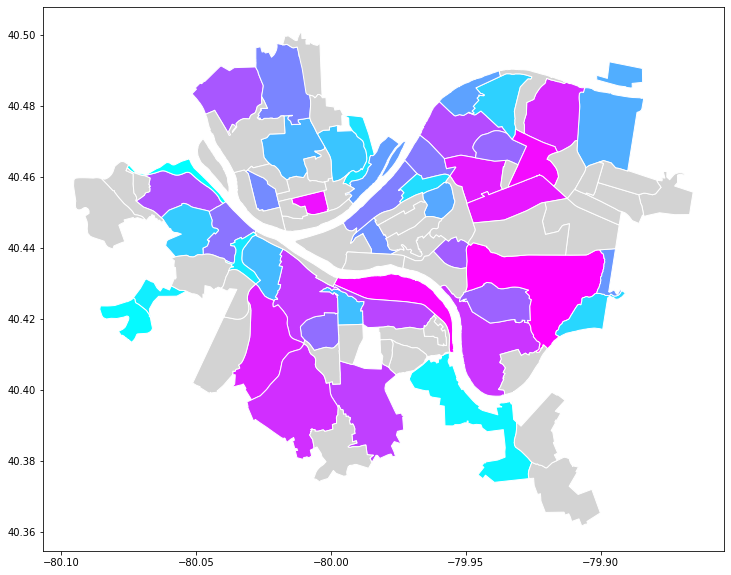

In [10]:
#Creating the Choropleth Map for the average ratings

play_map = hood.merge(averages, how='left', left_on='hood', right_on='index')
play_map.plot(column='Average Rating',
            cmap='cool',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=False,              # show the legend
               legend_kwds={'label': "index"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
             )

# Conclusions:
## Hannah: 
Honestly, I do not have any experience with Pittsburgh neighborhoods. I've been living on campus, so I only know a very small amount of information about Oakland. I hadn't even heard of most of the neighborhoods I was gathering data on, but I have been through Squirrel Hill South on a bus before. It looks nice enough, and as far as our data shows, it proves to be the best neighborhoods in Pittsburgh. Of course, we don't have an average rating for many of the neighborhoods in Pittsburgh, so this could mean that another neighborhood might be better. However, seeing as Squirrel Hill South beat out the other neighborhoods in the playgroud by a lot, isn't too far behind the Central Business District for public art, and is in the top five for number of traffic signs, I'd say that it makes sense that Squirrel Hill South came out on top. Judging from our data, Squirrel Hill South was in the top for each dataset, and because it scored so highly for three vastly different datasets, I am going to assume that it would score similarly high in other datasets making it overall the best neighborhood in Pittsburgh

## Jennifer: 
  
I was surprised by how many public art pieces there were in Pittsburgh. I also do not know much about Pittsburgh's neighborhoods, so it was interesting to discover what kinds of art are there and which neighborhoods had the most, one of them being Squirrel Hill South.

## Jessica:
After finding and looking over the data, I realized that our perfect neighborhood is very different than my personal favorite neighborhood. These specific characteristics of our perfect neighborhood Squirrel Hill South, aren't things I really noticed in my favorite neighborhood, but they are both good neighborhoods with differing qualities.